<a href="https://colab.research.google.com/github/MuhammadAinurR/TugasBesarTKC/blob/main/CBIR_Project_146_180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TKC/

Mounted at /content/drive
/content/drive/MyDrive/TKC


In [4]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir='/content/drive/MyDrive/TKC/train'
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [5]:
# Gather Data Validation
val_data = []
val_label = []

testi_dir='/content/drive/MyDrive/TKC/valid'
for r, d, f in os.walk(testi_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)
val_data = np.array(val_data)
val_label = np.array(val_label)

In [6]:
print("Train Data       = ", train_data.shape)
print("Train Label      = ", train_label.shape)
print("Validation Data  = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data       =  (6149, 150, 150, 3)
Train Label      =  (6149,)
Validation Data  =  (1020, 150, 150, 3)
Validation Label =  (1020,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [ 75  96 128]
Data setelah di-normalisasi  [0.29411766 0.3764706  0.5019608 ]


In [8]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['train' 'train' 'train' 'train' 'train' 'train' 'train' 'train' 'train'
 'train']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [10]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [11]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [13]:
H = model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
308/308 [==============================] - 134s 434ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc: 1.0000
Epoch 2/10
308/308 [==============================] - 133s 433ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc: 1.0000
Epoch 3/10
308/308 [==============================] - 133s 433ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc: 1.0000
Epoch 4/10
308/308 [==============================] - 134s 435ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc: 1.0000
Epoch 5/10
308/308 [==============================] - 134s 435ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc: 1.0000
Epoch 6/10
308/308 [==============================] - 134s 435ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc: 1.0000
Epoch 7/10
308/308 [==============================] - 134s 436ms/step - loss: 1.5047e-16 - acc: 1.0000 - val_loss: 5.4885e-15 - val_acc:

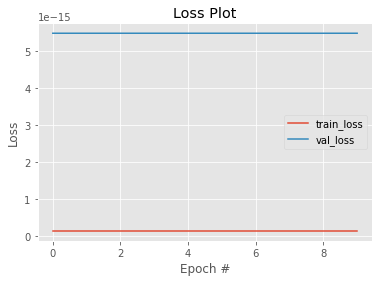

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

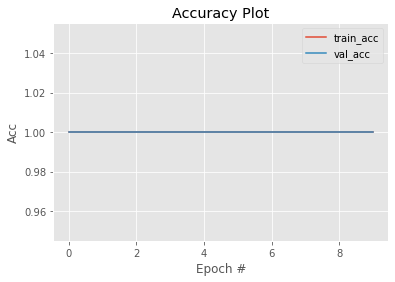

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020

